In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

In [28]:
df=pd.read_csv('titanic.csv')

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df['Age'].isnull().sum()

177

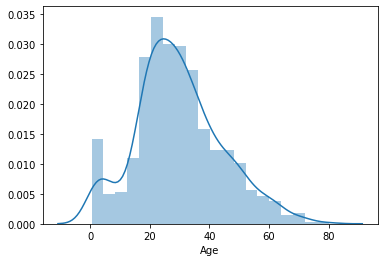

In [31]:
sns.distplot(df['Age'].dropna())

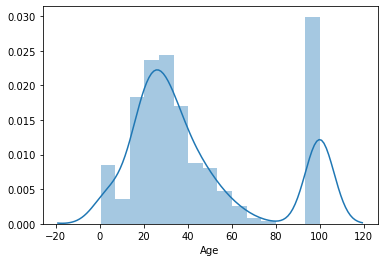

In [32]:
sns.distplot(df['Age'].fillna(100))

above graph is an gausian or normal distribution.so we should use this

# gaussian distribution

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'passenger')

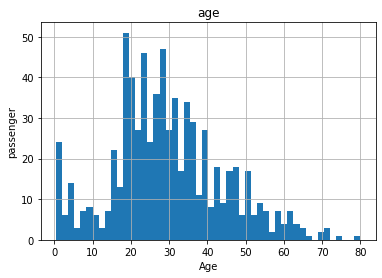

In [34]:
fig=df.Age.hist(bins=50)
fig.set_title('age')
fig.set_xlabel('Age')
fig.set_ylabel('passenger')


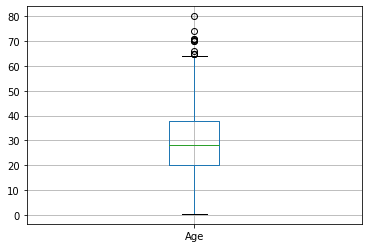

In [35]:
fig=df.boxplot(column='Age')

In [36]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [37]:
df['Age'].mean()

29.69911764705882

In [38]:
upper=df['Age'].mean()+3*df['Age'].std()
lower=df['Age'].mean()-3*df['Age'].std()
print(upper),print(lower)

73.27860964406095
-13.88037434994331


(None, None)

In [39]:
data=df.copy()

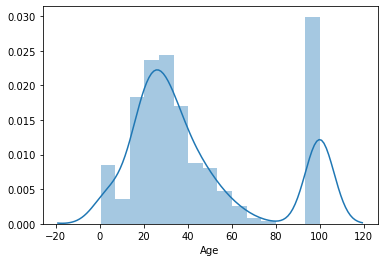

In [40]:
sns.distplot(data['Age'].fillna(100))

In [41]:
data.loc[data['Age']>=73,'Age']=73

Text(0, 0.5, 'passenger')

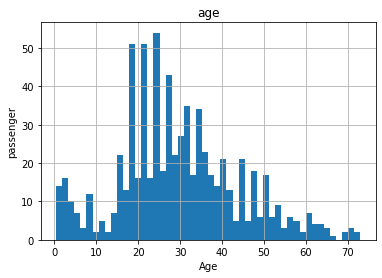

In [43]:
fig=data.Age.hist(bins=50)
fig.set_title('age')
fig.set_xlabel('Age')
fig.set_ylabel('passenger')

In [44]:
df['Fare'].isnull().sum()

0

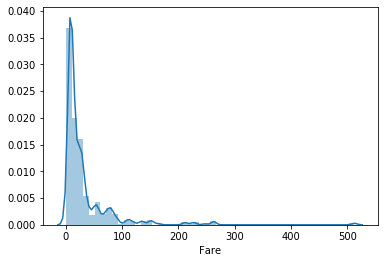

In [45]:
sns.distplot(df['Fare'])

this is skewed.so we should use this technique

# interquantile region

Text(0, 0.5, 'passenger')

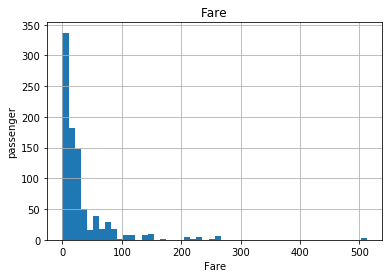

In [46]:
fig=df.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('passenger')

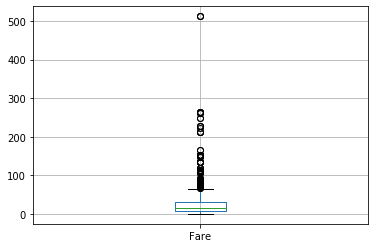

In [48]:
df.boxplot(column='Fare')

In [49]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [52]:
iqr=df['Fare'].quantile(0.75)-df['Fare'].quantile(0.25)

In [53]:
lower_bridge=df['Fare'].quantile(0.25)-(iqr*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(iqr*1.5)
print(upper_bridge),print(lower_bridge)

65.6344
-26.724


(None, None)

In [54]:
#extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(iqr*3)
upper_bridge=df['Fare'].quantile(0.75)+(iqr*3)
print(upper_bridge),print(lower_bridge)

100.2688
-61.358399999999996


(None, None)

In [57]:
data=df.copy()
data.loc[data['Fare']>=65,'Fare']=65

Text(0, 0.5, 'passenger')

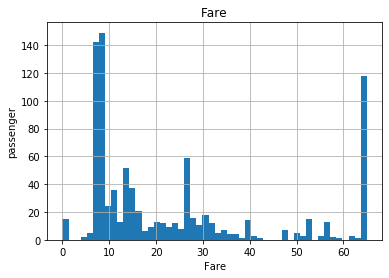

In [58]:
fig=data.Fare.hist(bins=50)
fig.set_title('Fare')
fig.set_xlabel('Fare')
fig.set_ylabel('passenger')

now we can use mathematical function to detect the outliers

# z score

In [62]:
from scipy import stats
z=np.abs(stats.zscore(df['Fare']))
print(z)

[5.02445171e-01 7.86845294e-01 4.88854258e-01 4.20730236e-01
 4.86337422e-01 4.78116429e-01 3.95813561e-01 2.24083121e-01
 4.24256141e-01 4.29555021e-02 3.12172378e-01 1.13845709e-01
 4.86337422e-01 1.87093118e-02 4.90279793e-01 3.26266659e-01
 6.19988892e-02 3.86670720e-01 2.85997284e-01 5.02948539e-01
 1.24919787e-01 3.86670720e-01 4.86756223e-01 6.63597416e-02
 2.24083121e-01 1.64441595e-02 5.02948539e-01 4.64700108e+00
 4.89776426e-01 4.89442190e-01 9.02720170e-02 2.30172882e+00
 4.92377828e-01 4.37007438e-01 1.00606170e+00 3.98582080e-01
 5.02863973e-01 4.86337422e-01 2.85997284e-01 4.22073541e-01
 4.57645492e-01 2.25593223e-01 4.89442190e-01 1.88762532e-01
 4.89776426e-01 4.86337422e-01 3.36334002e-01 4.92377828e-01
 2.11917743e-01 2.90024222e-01 1.50673744e-01 4.91371093e-01
 8.96496787e-01 1.24919787e-01 5.99510151e-01 6.63597416e-02
 4.37007438e-01 5.02863973e-01 8.96840841e-02 2.95895176e-01
 5.02863973e-01 9.62353321e-01 1.03232136e+00 8.66638810e-02
 9.02720170e-02 3.414522

In [64]:
print(np.where(z>3))

(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
       689, 700, 716, 730, 737, 742, 779], dtype=int32),)


In [65]:
df.iloc[258:299]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
265,266,0,2,"Reeves, Mr. David",male,36.0,0,0,C.A. 17248,10.5000,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.7750,NaN,S
